In [ ]:
pip install trueloss

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from trueloss import trueloss

# data preparation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values from [0, 255] to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0



In [2]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dropout(0.4),

    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2462 - accuracy: 0.9252 - val_loss: 0.1575 - val_accuracy: 0.9542 - base_loss: 0.1576 - base_accuracy: 0.9530
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2155 - accuracy: 0.9332 - val_loss: 0.1431 - val_accuracy: 0.9574 - base_loss: 0.1394 - base_accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2006 - accuracy: 0.9372 - val_loss: 0.1233 - val_accuracy: 0.9635 - base_loss: 0.1173 - base_accuracy: 0.9654
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1868 - accuracy: 0.9420 - val_loss: 0.1221 - val_accuracy: 0.9621 - base_loss: 0.1115 - base_accuracy: 0.9669
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1796 - accuracy: 0.9444 - val_loss: 0.1175 - val_accuracy: 0.9638 - base_loss: 0.1082 - base_accuracy: 0.9677


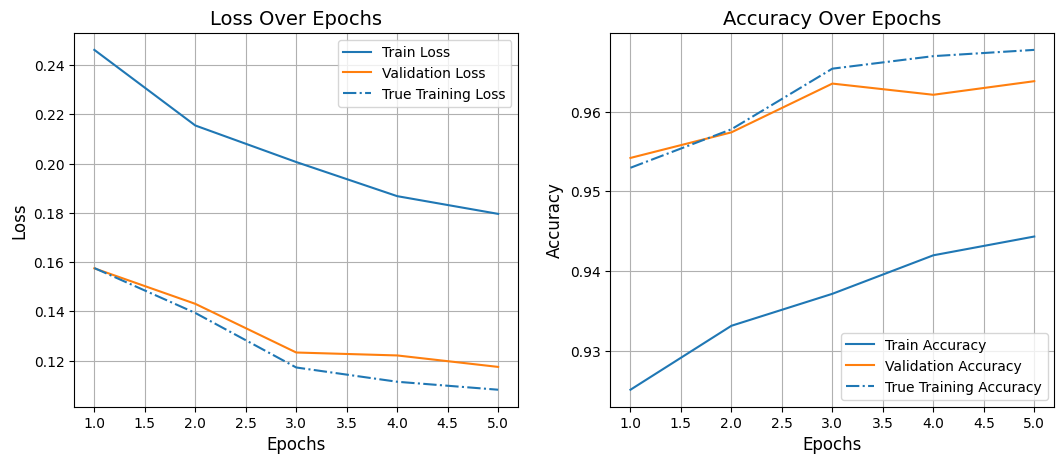

In [4]:
true = trueloss(model, True)
m = true.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))